In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns 
    
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

fileURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
lens=pd.read_csv(fileURL, names=['ID', 'Age', 'Spectacle_Prescription','Astigmatic','Tear_Production_Rate','Classes'],header=None,delim_whitespace=True)
lens = lens[['Age', 'Spectacle_Prescription','Astigmatic','Tear_Production_Rate','Classes']]

In [62]:
#from the dataset:
# There are 3 Classes:
#     1 : the patient should be fitted with hard contact lenses,
#     2 : the patient should be fitted with soft contact lenses,
#     3 : the patient should not be fitted with contact lenses.

#convert class 1 and 2 -> 1 (should be fitted with contact lenses), convert class 3 -> 0 (should not be fitted)

In [63]:
lens['Classes'].replace({1:1,2:1,3:0},inplace=True)

In [64]:
train, test = train_test_split(lens, shuffle=True, test_size=0.2)

In [65]:
lens[:5]

,Age,Spectacle_Prescription,Astigmatic,Tear_Production_Rate,Classes
0,1,1,1,1,0
1,1,1,1,2,1
2,1,1,2,1,0
3,1,1,2,2,1
4,1,2,1,1,0


In [66]:
dtc = tree.DecisionTreeClassifier(random_state=999)
train_features = train[['Age', 'Spectacle_Prescription','Astigmatic','Tear_Production_Rate']]
train_target = train[['Classes']]
test_features = test[['Age', 'Spectacle_Prescription','Astigmatic','Tear_Production_Rate']]
test_target = test[['Classes']]
dtc = dtc.fit(train_features, train_target)

In [67]:
y_pred = dtc.predict(test_features)
y_pred = np.array(y_pred)
y_pred

array([1, 0, 0, 0, 1], dtype=int64)

1. The accuracy of your model on the test data


In [68]:
accuracy_score(test_target, y_pred)

0.8

In [69]:
# The model predicts that 60% of the testing set correctly. The testing set contains 5 subjects, so 5 * 0.6 = 3 subjects
# predicted correctly

2. The precision and recall values


In [70]:
precision_recall_fscore_support(test_target, y_pred, average = 'binary')

(1.0, 0.6666666666666666, 0.8, None)

In [71]:
# Precision is defined as the number of true positives divided by the number of true positives
# plus the number of false positives. Recall on the other hand expresses the ability to find all relevant instances in a dataset.
# The precision score is 0.3333, essentially meaning that the classifier returned a lot of false positives. The recall score is 
# 1.0, essentially meaning that all relevant pieces of information were retrieved by the model.

3. A classification report (scikit-learn has a function that can create this for you)


In [72]:
target_names = ['0 - no lens', '1 - lens']
print(classification_report(test_target, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 0 - no lens       0.67      1.00      0.80         2
    1 - lens       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [73]:
# The classification report gives key metrics about a classification problem. It gives the precision, recall, f1-score, and
# support for each class you're trying to find. The recall means "how many of this class did you find over the whole number
# of element of this class". The precision means "how many are correctly classified among that class". The f1-score is the mean
# between the precision and recall. The support is the number of occurrence of the given class in your dataset.

4. The confusion matrix for this experiment


In [74]:
cm = confusion_matrix(test_target, y_pred)
# TP = true positive, TN = true negative, FP = false positive, FN = false negative
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP,TN,FP,FN

(2, 2, 0, 1)

In [75]:
# The confusion matrix predicts that there is 1 true positive, and 2 true negatives. It's hard to say with such a small sample
# size whether this is balanced or not, considering 1 is already half of 2...while simultaneously recognizing that this sample
# only goes up by increments of 1 at the very least.

5. An ROC curve


In [76]:
# generate y_pred in decimal form
y_pred_dec = dtc.predict_proba(test_features)
y_pred_dec1 = y_pred_dec[:,1]
y_pred_dec1

array([1., 0., 0., 0., 1.])

[0. 0. 1.]
[0.         0.66666667 1.        ]


Text(0, 0.5, 'True Positive Rate (tpr)')

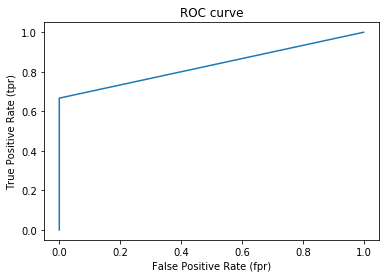

In [77]:
fpr, tpr, thresholds = roc_curve(test_target, y_pred_dec1)
plt.plot(fpr, tpr)

print(fpr)
print(tpr)

plt.title('ROC curve')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')

In [78]:
metrics.auc(fpr, tpr)

0.8333333333333333

In [79]:
# The ROC curve is constructed by plotting the true positive rate (tpr) against the false positive rate (fpr). Classifiers
# that give curves closer to the top left corner (ours is closer to the bottom left..) indicate better performance. The auc
# (area under curve) is a useful metric to summarize the performance of each classifier into a single measure. A score of .66
# is pretty lackluster, and indicates a true positive rate of 66% before producing any false positives. Again, keep in mind the
# small sample size. Subsequent runs with the same model may result in drastically different results because of said small sample
# sizes.

6. A Precision/Recall curve

[0.6 1.  1. ]
[1.         0.66666667 0.        ]


Text(0, 0.5, 'Precision')

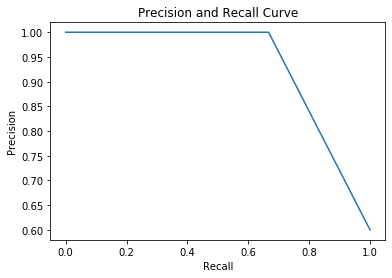

In [80]:
precision, recall, thresholds = precision_recall_curve(test_target, y_pred_dec1)
plt.plot(recall, precision)

print(precision)
print(recall)

plt.title('Precision and Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [81]:
# Precision-recall curves plot the positive predictive value (PPV) against the true positive rate (TPR). It is useful in cases
# where there is an imbalance in the observations between two classes. It's hard to judge this example as the sample size is 
# so small.

Similarly as in previous step, train another Decision Tree Classifier - but in this case
set the maximum depth of the tree to 1 (max_depth = 1). Use the same training and
test set as you used for the Decision Tree in the previous step

In [82]:
dtc2 = tree.DecisionTreeClassifier(random_state=999, max_depth=1)
train_features2 = train[['Age', 'Spectacle_Prescription','Astigmatic','Tear_Production_Rate']]
train_target2 = train[['Classes']]
test_features2 = test[['Age', 'Spectacle_Prescription','Astigmatic','Tear_Production_Rate']]
test_target2 = test[['Classes']]
dtc2 = dtc2.fit(train_features2, train_target2)

In [83]:
y_pred2 = dtc2.predict(test_features2)
y_pred2 = np.array(y_pred2)
y_pred2

array([1, 0, 1, 0, 1], dtype=int64)

1. The accuracy of your model on the test data

In [84]:
accuracy_score(test_target2, y_pred2)

1.0

In [85]:
# The accuracy score is significantly higher when the depth is limited to 1. 1>.8. This indicates that the model predicts 100%
# of the testing set correctly.

2. The precision and recall values


In [86]:
precision_recall_fscore_support(test_target2, y_pred2, average = 'binary')

(1.0, 1.0, 1.0, None)

In [87]:
# The precision score is 1.0, meaning that the classifier returned no false positives. The recall score is 1.0, meaning that all 
# relevant pieces of information were retrieved by the model. This is significantly better than the first test case

3. A classification report (scikit-learn has a function that can create this for you)


In [88]:
target_names = ['0 - no lens', '1 - lens']
print(classification_report(test_target2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

 0 - no lens       1.00      1.00      1.00         2
    1 - lens       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



4. The confusion matrix for this experiment


In [89]:
cm = confusion_matrix(test_target, y_pred)
# TP = true positive, TN = true negative, FP = false positive, FN = false negative
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP,TN,FP,FN

(2, 2, 0, 1)

In [90]:
# As expected, better than the first

5. An ROC curve


In [91]:
# generate y_pred in decimal form
y_pred_dec2 = dtc.predict_proba(test_features)
y_pred_dec2 = y_pred_dec2[:,1]
y_pred_dec2

array([1., 0., 0., 0., 1.])

[0. 0. 1.]
[0.         0.66666667 1.        ]


Text(0, 0.5, 'True Positive Rate (tpr)')

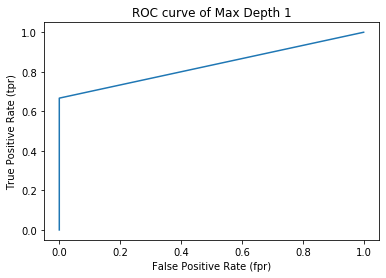

In [92]:
fpr2, tpr2, thresholds2 = roc_curve(test_target2, y_pred_dec2)
plt.plot(fpr2, tpr2)

print(fpr2)
print(tpr2)

plt.title('ROC curve of Max Depth 1')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')

In [93]:
metrics.auc(fpr2, tpr2)

0.8333333333333333

In [ ]:
# Essentially the same as the previous testing set. It can look good or bad depending on how the testing set is running considering
# the small sample size.

6. A Precision/Recall curve

[0.6 1.  1. ]
[1.         0.66666667 0.        ]


Text(0, 0.5, 'Precision')

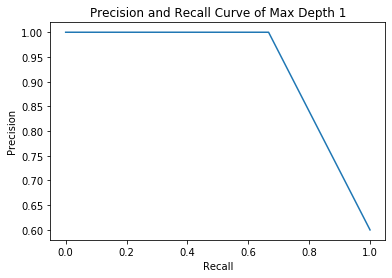

In [94]:
precision2, recall2, thresholds2 = precision_recall_curve(test_target2, y_pred_dec2)
plt.plot(recall2, precision2)

print(precision2)
print(recall2)

plt.title('Precision and Recall Curve of Max Depth 1')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
# Essentially the same as the previous testing set. It can look good or bad depending on how the testing set is running considering
# the small sample size.